<a href="https://colab.research.google.com/github/Luiz2020-ops/Inteligencia-Artificial-Ufla/blob/main/problema_mochila01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

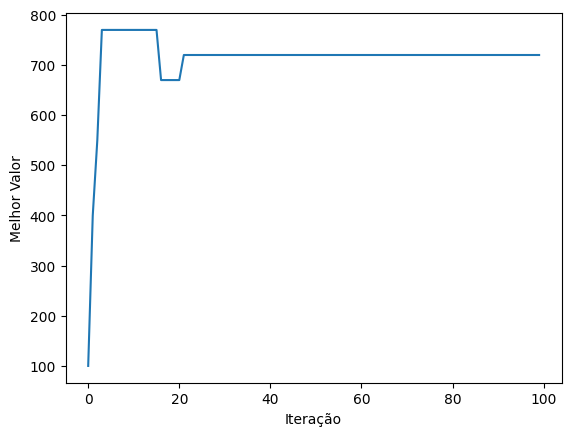

--------------------------------------------------------------------


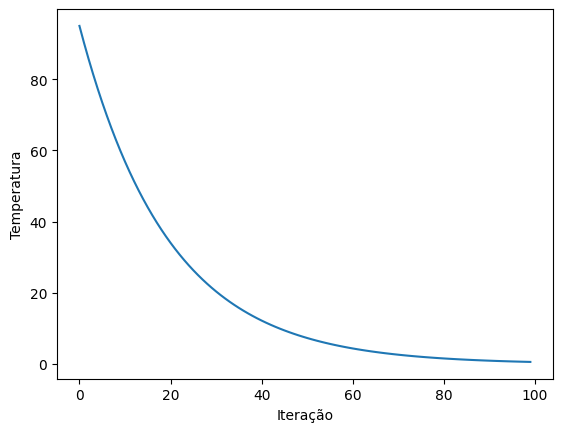

--------------------------------------------------------------------


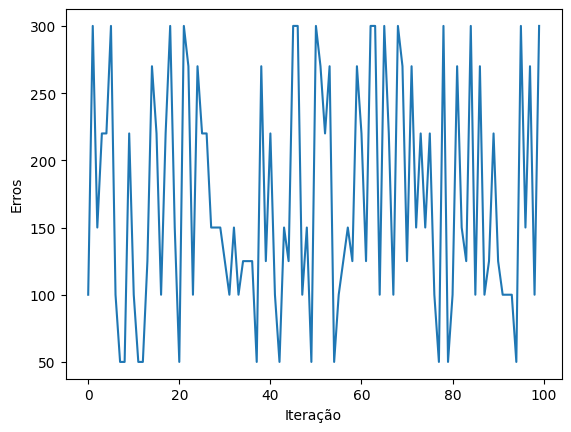

Melhor solução:
Item 2 = peso: 3, e valor: 100
Item 4 = peso: 5, e valor: 150
Item 5 = peso: 7, e valor: 220
Item 7 = peso: 10, e valor: 300


In [84]:
#importações utilizadas
import random
import math
import matplotlib.pyplot as plt

#inicialização da classe
class Item:
    def __init__(self, peso, valor):
        self.peso = peso
        self.valor = valor

#função referente ao algoritmo Simulated Annealing
def melhor_combinacao(itens, capacidade_mochila, temperatura_inicial, temperatura_final, resfriamento, iteracoes):
    #definimos a solucao atual, que contem o mesmo tamanho da lista declarada no comeco do código
    solucao_atual = [0] * len(itens)

    #iniciamos a melhor solucao contendo a solucao atual (por enquanto é a unica que existe)
    melhor_solucao = solucao_atual.copy()

    #peso atual da mochila comeca zerada
    peso_atual = 0

    #temperatura atual é a temperatura inicial definida no comeco do código
    temperatura_atual = temperatura_inicial

    #vetores responsáveis por armazenar as informações(valores usados, temperaturas atingidas, taxas de erros) durante a execução do programa
    valores_usados = []
    temperaturas_atingidas = []
    erros = []

    #for principal do programa, fica em loop até que o número de iterações definido no comeco do código é atingido
    for x in range(iteracoes):
        #a cada nova iteracao cria-se novas combinações de itens na mochila_vizinha
        solucao_vizinho = itens_vizinho(solucao_atual)

        #faz o calculo do valore atual dos itens da mochila_atual
        valor_atual = calcula_valores(solucao_atual, itens)

        #faz o calculo do valor atual dos itens da mochila_vizinha
        valor_novo = calcula_valores(solucao_vizinho, itens)

        #calcula a diferença entre o valor dos itens da mochila_atual e mochila_vizinha
        diferenca_valores = valor_novo - valor_atual

        #armazena a diferenca entre o valor dos itens da mochila_atual e mochila vizinha
        #usa a funcao abs para converter valores negativos(caso tenha) em valores positivos
        taxa_erro = abs(valor_atual - valor_novo)

        #verifica se a mochila _vizinha possui uma combinação de itens viável para a capacidade total da mochila
        if eh_viavel(solucao_vizinho, itens, capacidade_mochila):
            #defini qual das mochilas sera considerada como a melhor solucao
            if diferenca_valores > 0:
                solucao_atual = solucao_vizinho
                if valor_novo > calcula_valores(melhor_solucao, itens):
                    melhor_solucao = solucao_vizinho

                    valor_atual = valor_novo

            else:
                probabilidade = math.exp(diferenca_valores / temperatura_atual)
                if random.random() < probabilidade:
                    solucao_atual = solucao_vizinho

                    valor_atual = valor_novo

        #faz o resfriamento da temperatura utilizando a taxa de resfriamento passada,
        #utiliza a funcao max para que o valor nao ultrapasse o valor da temperatura final definida
        temperatura_atual = max(temperatura_atual * resfriamento, temperatura_final)

        #adiciona os respectivos valores nos vetores para gerar os gráficos
        valores_usados.append(valor_atual)
        temperaturas_atingidas.append(temperatura_atual)
        erros.append(taxa_erro)


    #grafico mostrando os melhores valores encontrados para a mochila durante a execução do programa
    plt.plot(range(iteracoes), valores_usados)
    plt.xlabel('Iteração')
    plt.ylabel('Melhor Valor')
    plt.show()

    print('--------------------------------------------------------------------')
    #grafico mostrando a temperatura durante a execução do programa
    plt.plot(range(iteracoes), temperaturas_atingidas)
    plt.xlabel('Iteração')
    plt.ylabel('Temperatura')
    plt.show()

    print('--------------------------------------------------------------------')
    #grafico mostrando os erros durante a execução do programa
    plt.plot(range(iteracoes), erros)
    plt.xlabel('Iteração')
    plt.ylabel('Erros')
    plt.show()

    return melhor_solucao



def itens_vizinho(solucao):
    # Retira um item e adiciona outro de forma aleatório, ocorre na mochila_vizinha
    solucao_vizinho = solucao.copy()
    indice = random.randint(0, len(solucao_vizinho) - 1)
    solucao_vizinho[indice] = 1 - solucao_vizinho[indice]
    return solucao_vizinho


def calcula_valores(solucao, itens):
    #faz a soma de cada valor de todos os itens que estao na mochila
    valor = 0
    for x in range(len(solucao)):
        if solucao[x] == 1:
            valor += itens[x].valor
    return valor


def eh_viavel(solucao, itens, capacidade_mochila):
    #faz a soma do peso de todos os itens que estao na mochila_vizinha e verifica se esse peso é maior que a capacidade total da mochila,
    #caso seja, nao considera essa combinacao atual de itens e retorna false
    peso = 0
    for x in range(len(solucao)):
        if solucao[x] == 1:
            peso += itens[x].peso
            if peso > capacidade_mochila:
                return False
    return True





#itens que poderao ser adicionados na mochila contendo seus respectivos pesos e valores
itens = [
    Item(1, 50),    #item_1 == peso = 1, valor = 50
    Item(3, 100),   #item_2 == peso = 3, valor = 100
    Item(4, 125),   #item_3 == peso = 4, valor = 125
    Item(5, 150),   #item_4 == peso = 5, valor = 150
    Item(7, 220),   #item_5 == peso = 7, valor = 220
    Item(9, 270),   #item_6 == peso = 9, valor = 270
    Item(10, 300),  #item_7 == peso = 10, valor = 300
]

#dados da mochila
capacidade_mochila = 25    #capacidade da mochila

temperatura_inicial = 100 #temperatura inicial
temperatura_final = 0.1   #temperatura final
resfriamento = 0.95       #taxa de resfriamento
iteracoes = 100           #numero da iterações



# Executa o algoritmo Simulated Annealing e armazena o resultado nessa variavel
combinacao_final = melhor_combinacao(itens, capacidade_mochila, temperatura_inicial, temperatura_final, resfriamento, iteracoes)


# Imprime a melhor solução encontrada no momento
print("Melhor solução:")
for x in range(len(combinacao_final)):
    if combinacao_final[x] == 1:
        print(f"Item {x+1} = peso: {itens[x].peso}, e valor: {itens[x].valor}")




